Training data shapes: X=(60000, 28, 28), y=(60000,)
Test data shapes: X=(10000, 28, 28), y=(10000,)


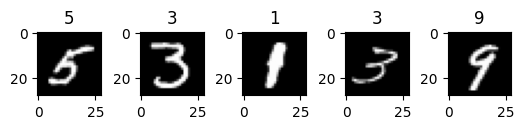

In [1]:
# Gerekli kütüphaneleri import ediyoruz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.datasets import mnist  # MNIST veri setini yüklemek için

# MNIST veri setini yükleyip eğitim ve test verilerine ayırıyoruz
(trainX, trainy), (testX, testy) = mnist.load_data()

# Eğitim ve test veri setlerinin boyutlarını ekrana yazdırıyoruz
print("Training data shapes: X=%s, y=%s" % (trainX.shape, trainy.shape))
print("Test data shapes: X=%s, y=%s" % (testX.shape, testy.shape))

# Eğitim setinden rastgele 5 örnek seçip görselleştiriyoruz
for j in range(5):
    i = np.random.randint(0, 10000)  # 0-9999 arasında rastgele bir index seç
    plt.subplot(550 + 1 + j)         # 5x5 boyutlu subplot alanı (tek satırda 5 görsel)
    plt.imshow(trainX[i], cmap="gray")  # Görüntüyü gri tonlamalı olarak göster
    plt.title(trainy[i])                # Görüntünün gerçek etiketini başlık olarak ekle
plt.show()

Bu kod bloğu ile MNIST veri setini yükledik ve eğitim ile test verilerini ayırdık. MNIST, el yazısı rakamlardan oluşan 28x28 boyutunda gri tonlamalı 70.000 görüntü içerir; 60.000 eğitim ve 10.000 test örneği olarak ayrılmıştır. Eğitim ve test veri setlerinin boyutlarını kontrol ettikten sonra, eğitim setinden rastgele seçilen 5 örneği görselleştirdik. Bu görseller sayesinde veri setinin genel yapısı ve rakamların görselliği hakkında hızlı bir fikir sahibi oluyoruz.

In [2]:
# Görüntü piksel değerlerini 0-1 aralığına normalleştiriyoruz, böylece model daha hızlı ve verimli öğrenir
trainX = trainX / 255
testX = testX / 255

# 28x28 boyutundaki görüntüleri tek boyutlu 784 elemanlı vektör hâline getiriyoruz
# Autoencoder modeline giriş olarak düzleştirilmiş veri gerekiyor
train_data = np.reshape(trainX, (60000, 28*28))
test_data = np.reshape(testX, (10000, 28*28))

# Yeni boyutları ekrana yazdırıyoruz
print(train_data.shape, test_data.shape)

(60000, 784) (10000, 784)


Gri tonlamalı MNIST görüntülerinin piksel değerleri 0 ile 255 arasında değiştiği için, modelin daha verimli öğrenebilmesi amacıyla tüm değerler 0-1 aralığına normalleştirildi. Ayrıca, Autoencoder modelinde her görüntü tek boyutlu bir vektör olarak işleneceği için 28x28 boyutundaki görüntüler 784 elemanlı dizilere dönüştürüldü. Sonuç olarak, eğitim ve test veri setleri sırasıyla (60000, 784) ve (10000, 784) boyutlarına sahip hâle geldi.

In [3]:
# Autoencoder'in kodlayıcı (encoder) kısmını oluşturuyoruz
import tensorflow

# Girdi katmanı: 784 boyutlu düzleştirilmiş MNIST görüntüsü
input_data = tensorflow.keras.layers.Input(shape=(784,))

# İlk yoğun (Dense) katman: 100 nöron
encoder = tensorflow.keras.layers.Dense(100)(input_data)
encoder = tensorflow.keras.layers.Activation("relu")(encoder)  # ReLU aktivasyonu ile doğrusal olmayan öğrenme

# İkinci yoğun katman: 50 nöron
encoder = tensorflow.keras.layers.Dense(50)(encoder)
encoder = tensorflow.keras.layers.Activation("relu")(encoder)

# Üçüncü yoğun katman: 25 nöron
encoder = tensorflow.keras.layers.Dense(25)(encoder)
encoder = tensorflow.keras.layers.Activation("relu")(encoder)

# Kodlanmış katman: 2 boyutlu sıkıştırılmış temsil
encoded = tensorflow.keras.layers.Dense(2)(encoder)

Bu kod bloğu, Autoencoder’in kodlayıcı kısmını tanımlıyor. Kodlayıcı, 784 boyutlu giriş verisini giderek daha küçük boyutlara sıkıştırarak anlamlı bir temsil öğreniyor. İlk üç yoğun (Dense) katman sırasıyla 100, 50 ve 25 nöronla veriyi kademeli olarak sıkıştırıyor ve her katmanda ReLU aktivasyonu kullanılarak doğrusal olmayan ilişkiler öğreniliyor. Son katman ise veriyi 2 boyutlu bir temsil hâline getiriyor; bu, Autoencoder’in giriş verisini en kompakt ve anlamlı şekilde kodladığı kısmıdır.

In [4]:
# Autoencoder’in çözücü (decoder) kısmını oluşturuyoruz
# Kodlanmış 2 boyutlu temsilden giriş boyutuna geri dönmeyi amaçlıyor

# İlk Dense katman: 25 nöron, ReLU aktivasyonu ile
decoder = tensorflow.keras.layers.Dense(25)(encoded)
decoder = tensorflow.keras.layers.Activation("relu")(decoder)

# İkinci Dense katman: 50 nöron
decoder = tensorflow.keras.layers.Dense(50)(decoder)
decoder = tensorflow.keras.layers.Activation("relu")(decoder)

# Üçüncü Dense katman: 100 nöron
decoder = tensorflow.keras.layers.Dense(100)(decoder)
decoder = tensorflow.keras.layers.Activation("relu")(decoder)

# Çıkış katmanı: 784 boyutlu vektör, giriş görüntüsünü yeniden oluşturur
decoded = tensorflow.keras.layers.Dense(784)(decoder)

Bu kod bloğu, Autoencoder’in çözücü (decoder) kısmını tanımlıyor. Çözücü, kodlayıcı tarafından 2 boyutlu olarak sıkıştırılmış veriyi tekrar orijinal boyuta, yani 784 elemanlı vektöre geri dönüştürmeyi amaçlıyor. İlk üç yoğun katman sırasıyla 25, 50 ve 100 nöronla kademeli olarak boyutu artırıyor ve her katmanda ReLU aktivasyonu kullanılıyor. Son katman, giriş verisinin boyutuna eşit olan 784 nöronla çıktıyı üretiyor, böylece giriş görüntüsünün yeniden oluşturulmasını sağlıyor.

In [5]:
# Autoencoder modelini giriş ve çıkış katmanlarıyla oluşturuyoruz
# Giriş: 784 boyutlu vektör, Çıkış: yeniden oluşturulmuş 784 boyutlu vektör
autoencoder = tensorflow.keras.models.Model(inputs=input_data, outputs=decoded)

# Modeli derliyoruz: kayıp fonksiyonu olarak MSE (Mean Squared Error) ve optimizer olarak Adam kullanıyoruz
autoencoder.compile(loss="mse", optimizer="adam")

# Modelin katman yapısını ve parametre sayısını ekrana yazdırıyoruz
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │        79,184 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,536 (666.16 KB)

 Trainable params: 170,536 (666.16 KB)

 Non-trainable params: 0 (0.00 B)

Bu kod bloğu ile Autoencoder modeli oluşturuldu ve derlendi. Modelin giriş katmanı 784 boyutlu (28x28) düzleştirilmiş MNIST görüntüsünü alıyor ve çıkış katmanı da aynı boyutta, yeniden oluşturulmuş görüntüyü üretiyor. Kodlayıcı katmanlar veriyi kademeli olarak 100 → 50 → 25 → 2 boyutuna sıkıştırırken, çözücü katmanlar bu sıkıştırılmış temsili tekrar 25 → 50 → 100 → 784 boyutuna genişleterek giriş verisini yeniden oluşturuyor. Kayıp fonksiyonu olarak MSE (Mean Squared Error) kullanılması, modelin giriş ve çıkış arasındaki farkı minimize etmeye çalıştığını gösterir. summary() çıktısı, her katmanın boyutunu ve parametre sayısını göstererek modelin toplam 170,536 öğrenilebilir parametreye sahip olduğunu doğruluyor.

In [6]:
# Autoencoder modelini eğitim verisi üzerinde eğitiyoruz
# Girdi ve çıktı aynı (train_data), çünkü Autoencoder giriş verisini öğrenip yeniden oluşturmayı amaçlar
# epochs=10: eğitim verisi üzerinden model 10 kez güncellenecek
# batch_size=64: her adımda 64 örnek kullanılarak ağırlıklar güncellenir
autoencoder.fit(
    train_data, train_data,
    epochs=10,
    batch_size=64,
    validation_data=(test_data, test_data)  # Her epoch sonunda modelin test verisi üzerindeki performansını kontrol ediyoruz
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 12ms/step - loss: 0.0543 - val_loss: 0.0483
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0466 - val_loss: 0.0452
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0442 - val_loss: 0.0433
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0428 - val_loss: 0.0419
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0419 - val_loss: 0.0415
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0412 - val_loss: 0.0411
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0405 - val_loss: 0.0406
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0401 - val_loss: 0.0399
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0397 - val_loss: 0.0395
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0395 - val_loss: 0.0393


Autoencoder modeli 10 epoch boyunca eğitim verisi üzerinde eğitildi. Eğitim kaybı (loss) her epoch ile birlikte düzenli olarak azaldı ve son epoch’ta yaklaşık 0.0395 seviyesine ulaştı. Doğrulama kaybı (val_loss) da benzer şekilde azalarak 0.0393 civarında sabitlendi. Bu sonuçlar, modelin giriş verisini giderek daha doğru şekilde yeniden öğrenip oluşturduğunu gösteriyor. Eğitim ve doğrulama kayıplarının birbirine yakın olması, modelin overfitting yapmadığını ve test verisine karşı da iyi genelleme yaptığını işaret ediyor. Genel olarak model, MNIST verisini kodlayıcı ve çözücü katmanlar aracılığıyla başarılı bir şekilde öğrenmiş ve yeniden üretmeyi başarmıştır.

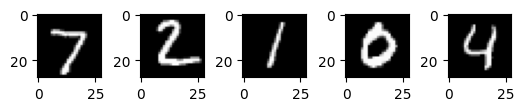

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


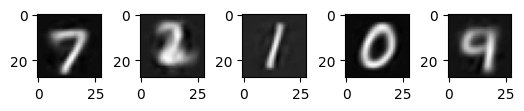

In [7]:
# Test veri kümesinden 5 örnek görüntüyü orijinal hâliyle gösteriyoruz
for i in range(5):
    plt.subplot(550 + 1 + i)
    plt.imshow(testX[i], cmap="gray")
plt.show()

# Aynı 5 örneği Autoencoder ile yeniden oluşturup görselleştiriyoruz
for i in range(5):
    plt.subplot(550 + 1 + i)
    output = autoencoder.predict(np.array([test_data[i]]))
    op_image = np.reshape(output[0]*255, (28,28))
    plt.imshow(op_image, cmap="gray")
plt.show()

Test veri kümesinde modelin performansını görselleştirerek değerlendirmek için orijinal ve yeniden oluşturulmuş görseller karşılaştırılır. İlk olarak test setinden bazı örnekler gösterilir; ardından aynı örnekler Autoencoder tarafından yeniden oluşturularak görselleştirilir. Bu karşılaştırma, modelin giriş verisini ne kadar başarılı şekilde öğrenip yeniden üretebildiğini gözlemlememizi sağlar.